In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from plotly import __version__
import plotly as py
import cufflinks as cf

%matplotlib inline

* Importing Plotly library. It's an interactive visualization tool which we'll be using to build a correlation matrix between the columns.

In [2]:
#Importing plotly libraries to visualize the correlation matrix.
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 

In [3]:
init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
py.tools.set_credentials_file(username='sanjogh777', api_key='j46R23oYyIuYXnrGmlaR')

In [5]:
loan4 = pd.read_csv('Cleaned_loan.csv')
loan4.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501     5000.0       5000.0           4975.0    36    0.1065   
1  1077430     2500.0       2500.0           2500.0    60    0.1527   
2  1077175     2400.0       2400.0           2400.0    36    0.1596   
3  1076863    10000.0      10000.0          10000.0    36    0.1349   
4  1075358     3000.0       3000.0           3000.0    60    0.1269   

   installment grade  emp_length home_ownership     ...      last_pymnt_amnt  \
0       162.87     B        10.0           RENT     ...               171.62   
1        59.83     C         1.0           RENT     ...               119.66   
2        84.33     C        10.0           RENT     ...               649.91   
3       339.31     C        10.0           RENT     ...               357.48   
4        67.79     B         1.0           RENT     ...                67.79   

  tot_cur_bal total_rev_hi_lim Default_Binary  delinq_2yrs_cat  \
0     80559.0          23700.0              0               no   
1     80559.0          23700.0              1               no   
2     80559.0          23700.0              0               no   
3     80559.0          23700.0              0               no   
4     80559.0          23700.0              0               no   

   inq_last_6mths_cat  total_rec_late_fee_cat  recoveries_cat  \
0                 yes                      no              no   
1                 yes                      no             yes   
2                 yes                      no              no   
3                 yes                     yes              no   
4                  no                      no              no   

   collection_recovery_fee_cat pub_rec_cat  
0                           no          no  
1                          yes          no  
2                           no          no  
3                           no          no  
4                           no          no  

[5 rows x 36 columns]

* We need to apply one-hot encoding to the categorical variables.

In [6]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 36 columns):
id                             842067 non-null int64
loan_amnt                      842067 non-null float64
funded_amnt                    842067 non-null float64
funded_amnt_inv                842067 non-null float64
term                           842067 non-null int64
int_rate                       842067 non-null float64
installment                    842067 non-null float64
grade                          842067 non-null object
emp_length                     842067 non-null float64
home_ownership                 842067 non-null object
annual_inc                     842067 non-null float64
verification_status            842067 non-null object
purpose                        842067 non-null object
addr_state                     842067 non-null object
dti                            842067 non-null float64
open_acc                       842067 non-null float64
revol_bal         

* We can see the column 'term' is an int. We need to convert it into a string and make it categorical as it has just 2 values - 36 and 60.*

In [7]:
loan4['term'] = loan4['term'].apply(str)

* Dropping the 'addr_state' column as it's not a significant feature.

In [8]:
loan4.drop('addr_state', axis = 1, inplace = True)

In [9]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 35 columns):
id                             842067 non-null int64
loan_amnt                      842067 non-null float64
funded_amnt                    842067 non-null float64
funded_amnt_inv                842067 non-null float64
term                           842067 non-null object
int_rate                       842067 non-null float64
installment                    842067 non-null float64
grade                          842067 non-null object
emp_length                     842067 non-null float64
home_ownership                 842067 non-null object
annual_inc                     842067 non-null float64
verification_status            842067 non-null object
purpose                        842067 non-null object
dti                            842067 non-null float64
open_acc                       842067 non-null float64
revol_bal                      842067 non-null float64
revol_util      

In [10]:
loan4['grade'] = loan4['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
loan4["home_ownership"] = loan4["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
loan4['purpose'] = loan4['purpose'].map({'debt_consolidation':14,'credit_card':13,'home_improvement':12,'other':11,'major_purchase':10,'small_business':9,'car':8,'medical':7,'moving':6,'vacation':5,'house':4,'wedding':3,'renewable_energy':2,'educational':1})
loan4['term'] = loan4['term'].map({'36':1, '60':2})
loan4['verification_status'] = loan4['verification_status'].map({'Verified':1,'Not Verified':2})
loan4['initial_list_status'] = loan4['initial_list_status'].map({'f':1,'w':2})
loan4['delinq_2yrs_cat'] = loan4['delinq_2yrs_cat'].map({'yes':1,'no':2})
loan4['inq_last_6mths_cat'] = loan4['inq_last_6mths_cat'].map({'yes':1,'no':2})
loan4['total_rec_late_fee_cat'] = loan4['total_rec_late_fee_cat'].map({'yes':1,'no':2})
loan4['recoveries_cat'] = loan4['recoveries_cat'].map({'yes':1,'no':2})
loan4['collection_recovery_fee_cat'] = loan4['collection_recovery_fee_cat'].map({'yes':1,'no':2})
loan4['pub_rec_cat'] = loan4['pub_rec_cat'].map({'yes':1,'no':2})

In [11]:
loan4.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501     5000.0       5000.0           4975.0     1    0.1065   
1  1077430     2500.0       2500.0           2500.0     2    0.1527   
2  1077175     2400.0       2400.0           2400.0     1    0.1596   
3  1076863    10000.0      10000.0          10000.0     1    0.1349   
4  1075358     3000.0       3000.0           3000.0     2    0.1269   

   installment  grade  emp_length  home_ownership     ...       \
0       162.87      6        10.0               5     ...        
1        59.83      5         1.0               5     ...        
2        84.33      5        10.0               5     ...        
3       339.31      5        10.0               5     ...        
4        67.79      6         1.0               5     ...        

   last_pymnt_amnt  tot_cur_bal  total_rev_hi_lim  Default_Binary  \
0           171.62      80559.0           23700.0               0   
1           119.66      80559.0           23700.0               1   
2           649.91      80559.0           23700.0               0   
3           357.48      80559.0           23700.0               0   
4            67.79      80559.0           23700.0               0   

   delinq_2yrs_cat  inq_last_6mths_cat  total_rec_late_fee_cat  \
0                2                   1                       2   
1                2                   1                       2   
2                2                   1                       2   
3                2                   1                       1   
4                2                   2                       2   

   recoveries_cat  collection_recovery_fee_cat  pub_rec_cat  
0               2                            2            2  
1               1                            1            2  
2               2                            2            2  
3               2                            2            2  
4               2                            2            2  

[5 rows x 35 columns]

In [12]:
#Correlation

In [13]:
loan4['id'] = loan4['id'].apply(str)

In [14]:
Correlation = loan4.corr()
Correlation

loan_amnt  funded_amnt  funded_amnt_inv  \
loan_amnt                     1.000000     0.999238         0.997000   
funded_amnt                   0.999238     1.000000         0.997942   
funded_amnt_inv               0.997000     0.997942         1.000000   
term                          0.408329     0.407357         0.408059   
int_rate                      0.149696     0.149831         0.149856   
installment                   0.944133     0.945190         0.942710   
grade                        -0.155770    -0.155511        -0.153432   
emp_length                    0.106663     0.106930         0.108478   
home_ownership                0.150042     0.149834         0.149677   
annual_inc                    0.324897     0.324666         0.323649   
verification_status          -0.298827    -0.298666        -0.300637   
purpose                       0.166092     0.166829         0.169308   
dti                           0.046759     0.047599         0.049935   
open_acc                      0.192227     0.192735         0.193411   
revol_bal                     0.331062     0.330922         0.329179   
revol_util                    0.117329     0.117850         0.118603   
total_acc                     0.220106     0.220037         0.220278   
initial_list_status           0.086011     0.087660         0.092024   
out_prncp                     0.644133     0.646118         0.648898   
out_prncp_inv                 0.644133     0.646118         0.648907   
total_pymnt                   0.470712     0.469346         0.464774   
total_pymnt_inv               0.471798     0.470626         0.470194   
total_rec_prncp               0.386276     0.385025         0.380532   
total_rec_int                 0.531205     0.530128         0.527562   
last_pymnt_amnt               0.226963     0.226489         0.225210   
tot_cur_bal                   0.319510     0.320334         0.321265   
total_rev_hi_lim              0.303073     0.303622         0.303938   
Default_Binary                0.005536     0.004809         0.001886   
delinq_2yrs_cat              -0.008106    -0.008447        -0.008953   
inq_last_6mths_cat            0.037242     0.037575         0.039052   
total_rec_late_fee_cat        0.011680     0.012134         0.014873   
recoveries_cat                0.001985     0.003025         0.006099   
collection_recovery_fee_cat   0.002875     0.003737         0.006770   
pub_rec_cat                   0.104430     0.104039         0.102799   

                                 term  int_rate  installment     grade  \
loan_amnt                    0.408329  0.149696     0.944133 -0.155770   
funded_amnt                  0.407357  0.149831     0.945190 -0.155511   
funded_amnt_inv              0.408059  0.149856     0.942710 -0.153432   
term                         1.000000  0.433159     0.139166 -0.447988   
int_rate                     0.433159  1.000000     0.136573 -0.954041   
installment                  0.139166  0.136573     1.000000 -0.132575   
grade                       -0.447988 -0.954041    -0.132575  1.000000   
emp_length                   0.069047  0.008961     0.090913 -0.004355   
home_ownership               0.087017 -0.047952     0.123214  0.048806   
annual_inc                   0.051582 -0.072694     0.319261  0.063934   
verification_status         -0.208394 -0.220730    -0.278977  0.213587   
purpose                      0.077098 -0.045737     0.152008  0.049546   
dti                          0.111888  0.162849     0.031454 -0.169614   
open_acc                     0.082241 -0.008047     0.177511 -0.002408   
revol_bal                    0.088285 -0.035065     0.314087  0.029215   
revol_util                   0.084517  0.267024     0.129332 -0.243974   
total_acc                    0.100742 -0.035973     0.197601  0.031229   
initial_list_status          0.132685 -0.114333     0.028819  0.071745   
out_prncp                    0.391890  0.044476     0.544021 -0.119587   
out_prncp_inv               

In [15]:
Correlation.iplot(kind ='heatmap', theme = 'pearl', colorscale = 'Greys')

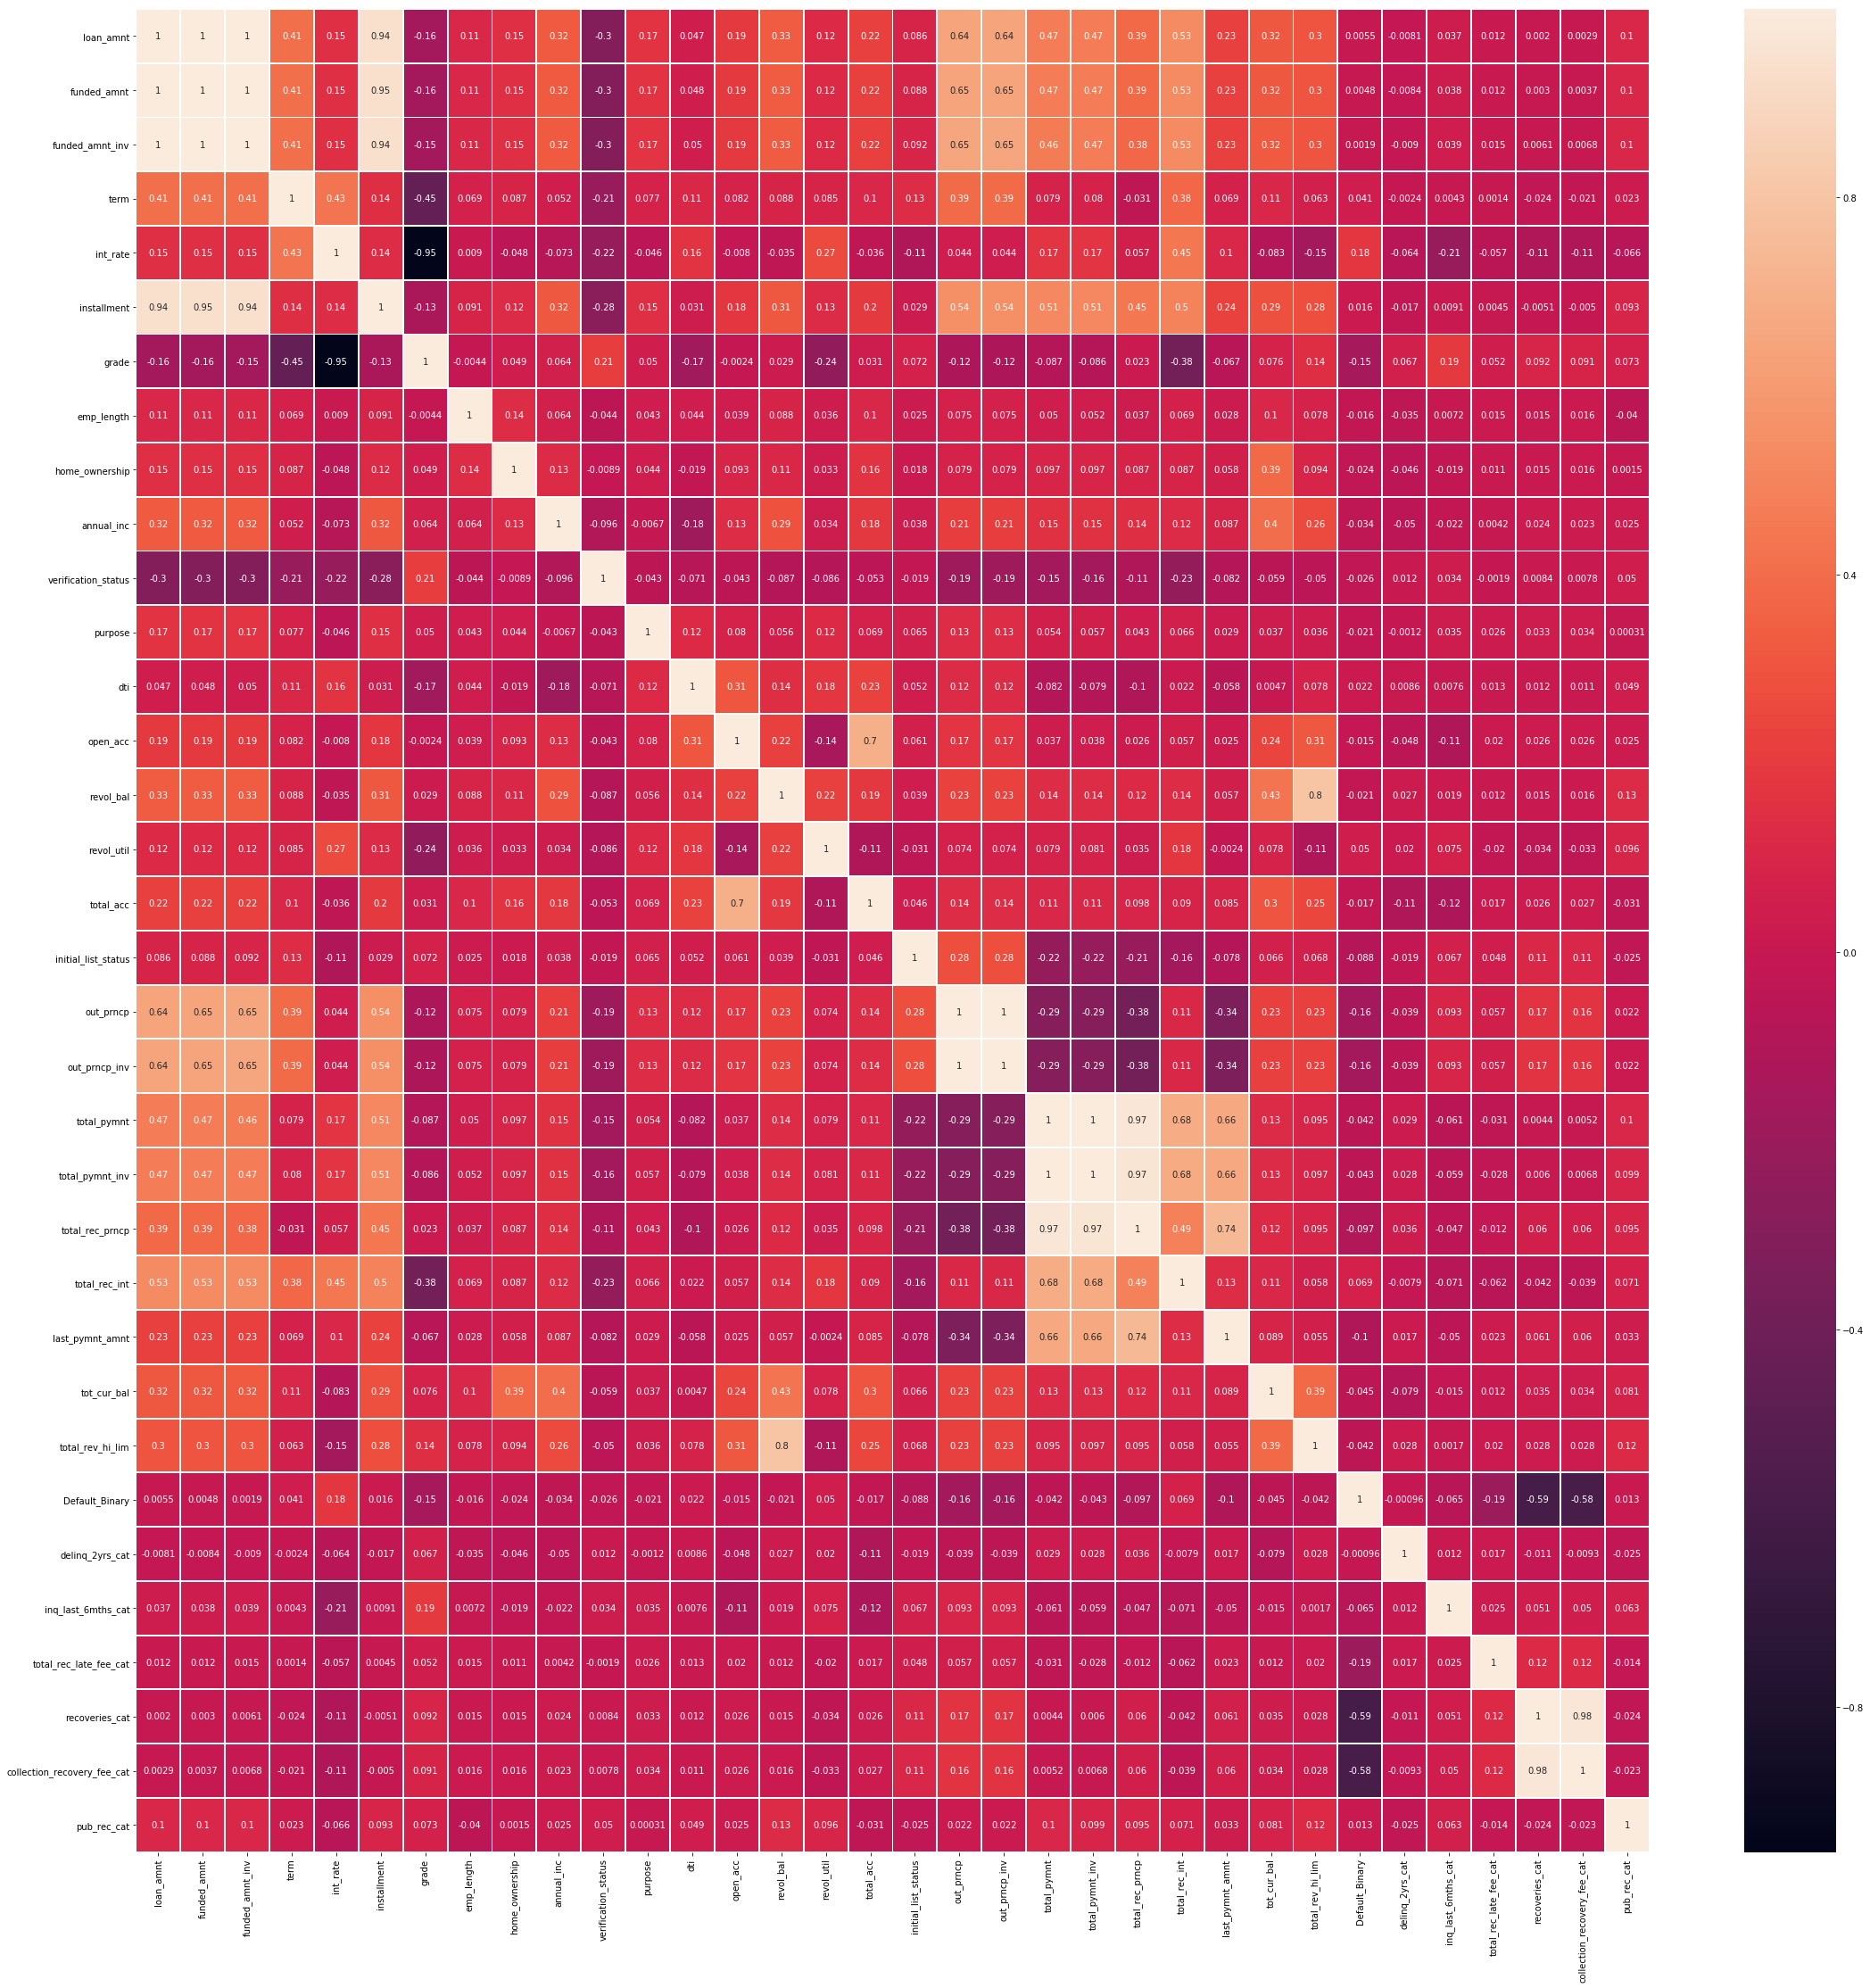

In [16]:
# plot the heatmap and annotation on it
plt.figure(figsize = (38,38))
sns.heatmap(Correlation, xticklabels=True, yticklabels=True, linewidths=0.9, annot=True)

* Following are the list of columns which are dropped because either they are completely correlated (i.e. correlation coefficient =1) or are very badly correlated with all other features. 

In [17]:
extra = ['funded_amnt','funded_amnt_inv','installment','recoveries_cat','total_pymnt_inv','total_rec_prncp','out_prncp_inv',
         'int_rate','collection_recovery_fee_cat']
loan4.drop(extra, axis=1, inplace=True)

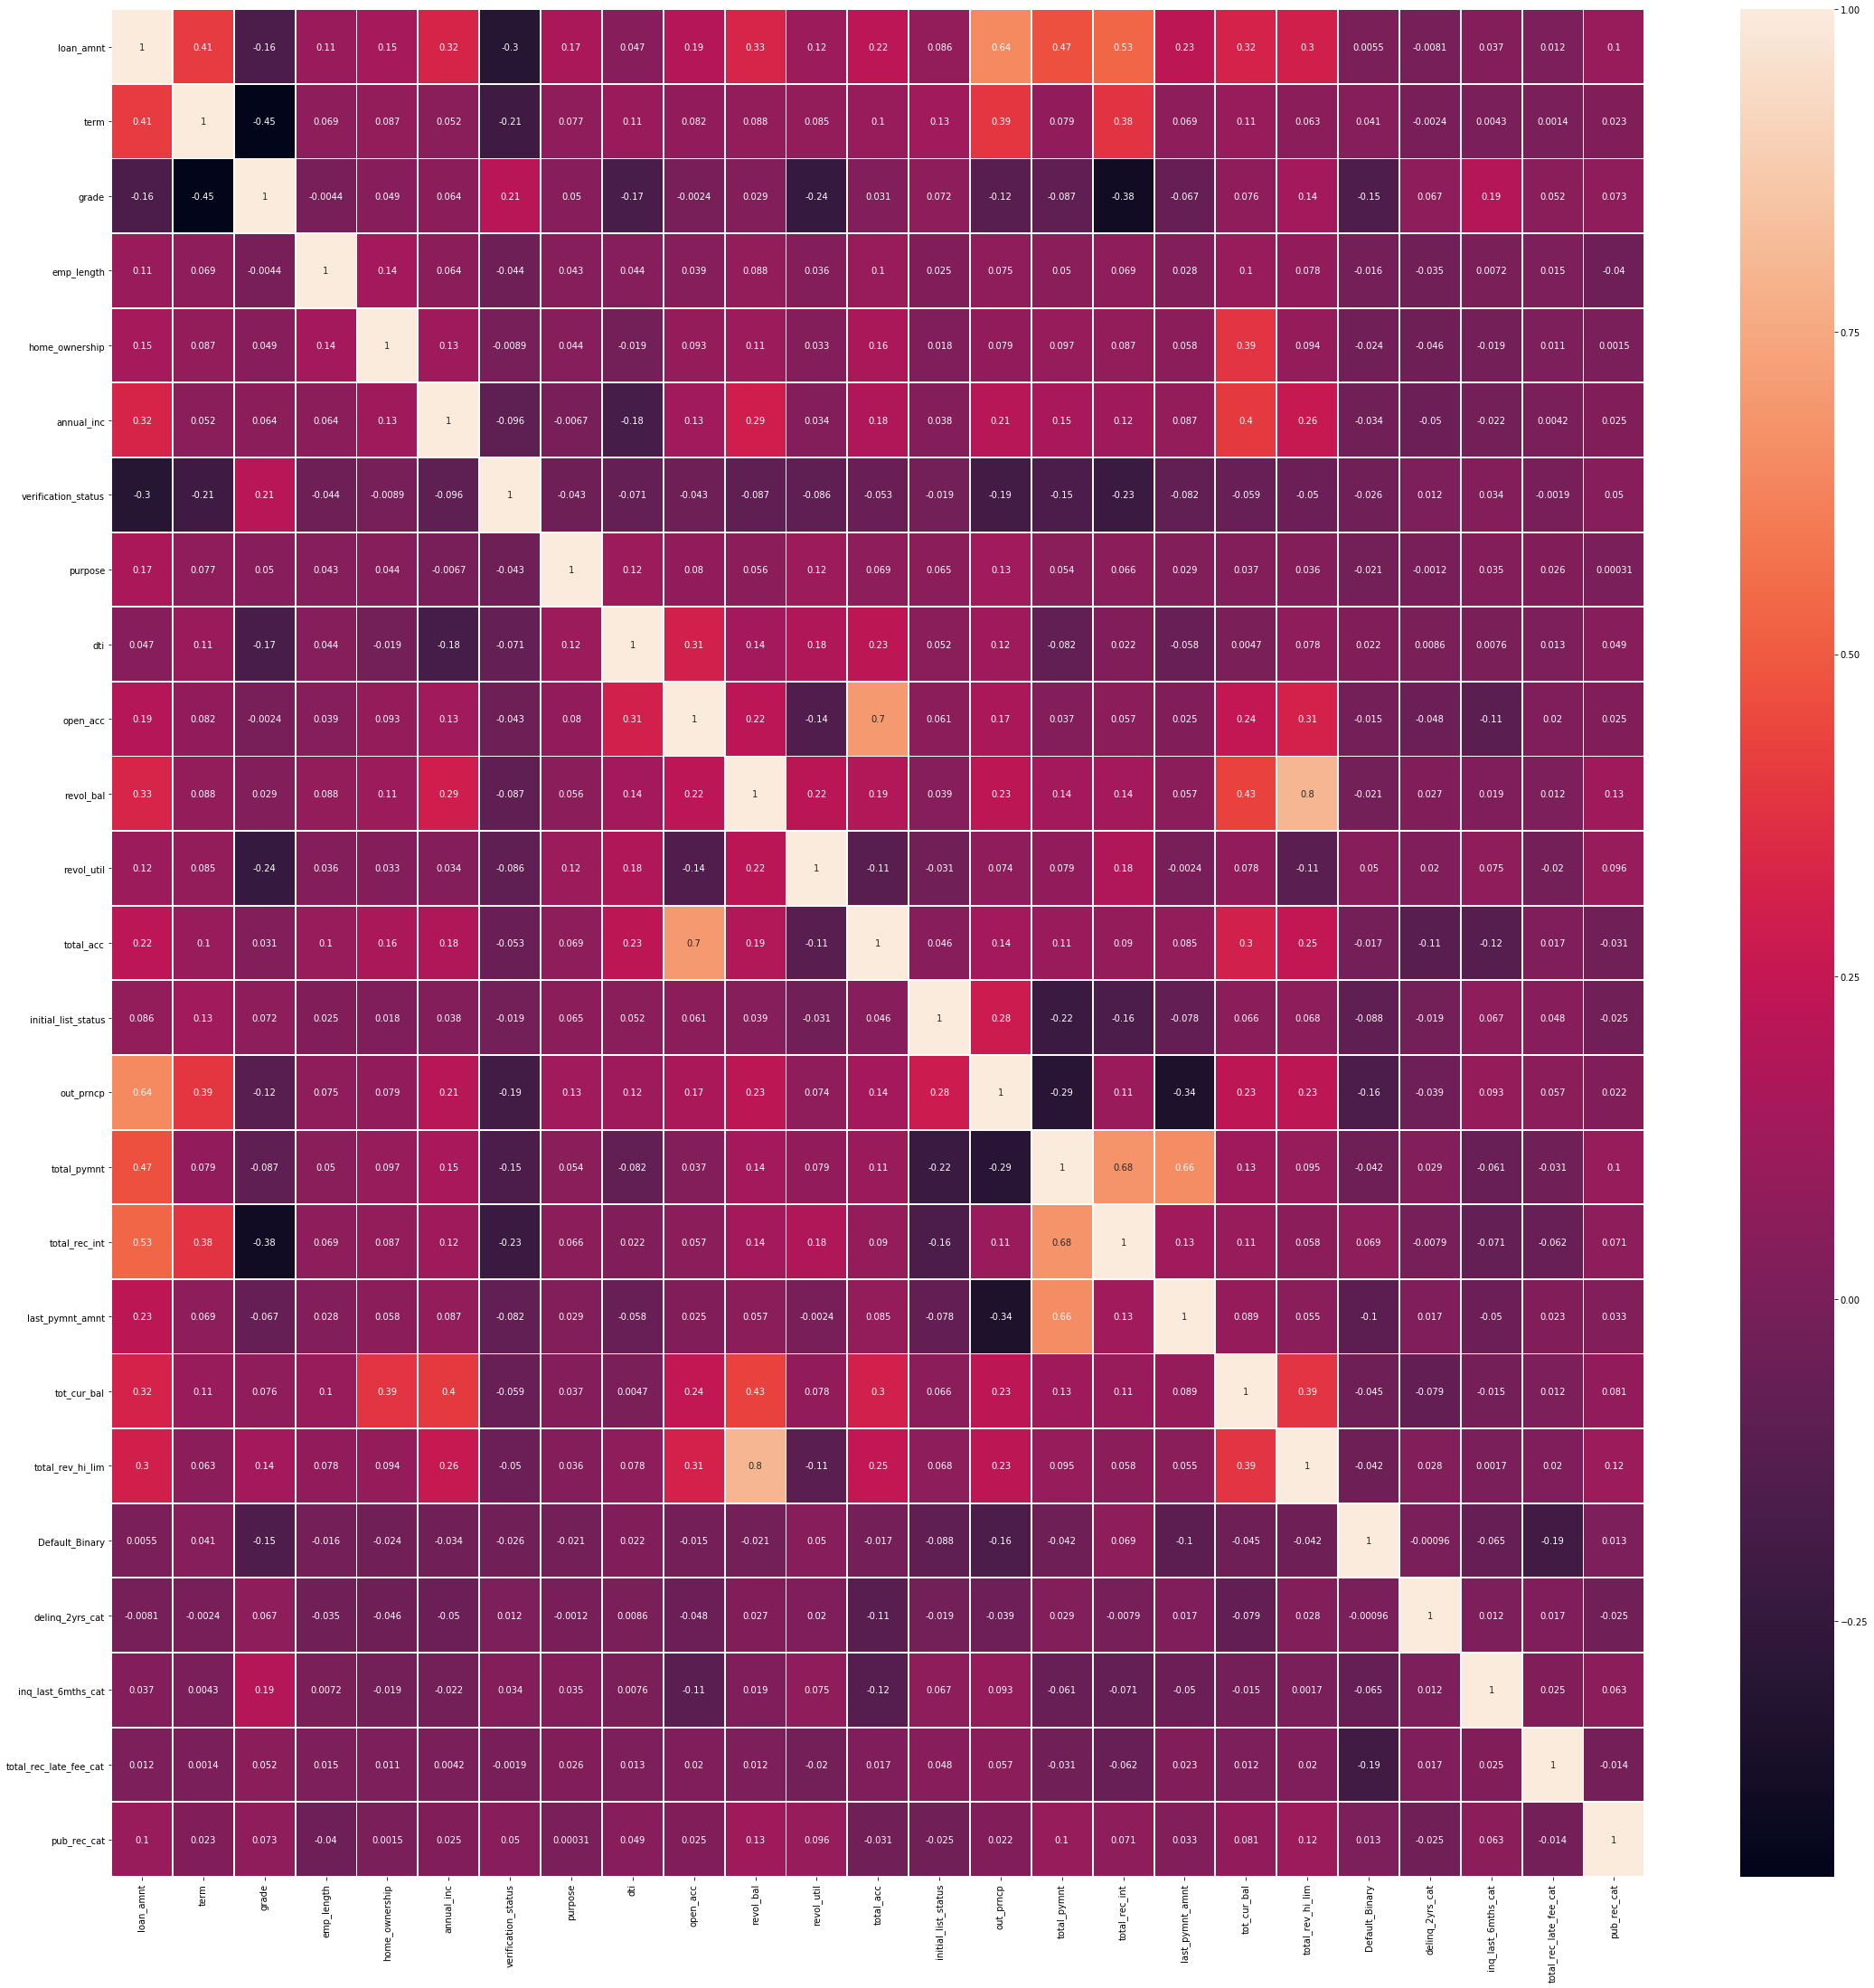

In [18]:
# plot the heatmap and annotation on it
New_corr = loan4.corr()
plt.figure(figsize = (38,38))
sns.heatmap(New_corr, xticklabels=True, yticklabels=True, linewidths=0.9, annot=True)

In [19]:
loan4.columns

Index(['id', 'loan_amnt', 'term', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt',
       'tot_cur_bal', 'total_rev_hi_lim', 'Default_Binary', 'delinq_2yrs_cat',
       'inq_last_6mths_cat', 'total_rec_late_fee_cat', 'pub_rec_cat'],
      dtype='object')

### Separating Training and test dataset.

In [20]:
from sklearn.model_selection import train_test_split

* Separating target column 'Default_Binary' from the rest of the data. The target variable is put in variable y.

In [21]:
X = loan4.loc[:, loan4.columns != 'Default_Binary']
y = loan4.loc[:, loan4.columns == 'Default_Binary']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
y_train['Default_Binary'].value_counts()

0    544836
1     44610
Name: Default_Binary, dtype: int64

* We can see that the distribution of samples in both the loan defaulters (1) and non- defaulters (0) to be very disproportionate. Hence we are going to oversample the dataset using SMOTE library.

In [24]:
from imblearn.combine import SMOTETomek

In [25]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (589446, 25)
Number transactions y_train dataset:  (589446, 1)
Number transactions X_test dataset:  (252621, 25)
Number transactions y_test dataset:  (252621, 1)


In [30]:
columns_x = X_train.columns
columns_y = y_train.columns


In [26]:
y_train['Default_Binary'].value_counts()

0    544836
1     44610
Name: Default_Binary, dtype: int64

In [27]:
sm = SMOTETomek(ratio='auto', random_state=0)

In [28]:
sm_X,sm_y = sm.fit_sample(X_train, y_train.values.ravel())

In [31]:
sm_X = pd.DataFrame(data=sm_X,columns=columns_x)
sm_y = pd.DataFrame(data=sm_y,columns=columns_y)

In [32]:
print("length of oversampled data is ",len(sm_X))
print("Number of defaulters",len(sm_y[sm_y['Default_Binary']==1]))
print("Number of non-defaulters",len(sm_y[sm_y['Default_Binary']==0]))

length of oversampled data is  1080032
Number of defaulters 540016
Number of non-defaulters 540016


* We can see that the total observations have increased from 589,446 to 1,089,672.
* Also the distribution of defaulters and non-defaulters are even now.

In [33]:
#Separating the 'id' column from the dataset.
user_id_train = sm_X['id']
user_id_test = X_test['id']
sm_X.drop(['id'], axis=1, inplace=True)
X_test.drop(['id'], axis=1, inplace=True)
y_train = sm_y

### We have to scale the X_train and X_test data to bring all the values in the same scale. 

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(sm_X), columns=sm_X.columns.values, index=sm_X.index.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values, index=X_test.index.values)

In [36]:
X_train.head()

loan_amnt  term     grade  emp_length  home_ownership  annual_inc  \
0   0.339130   1.0  0.666667    0.222222             1.0    0.009065   
1   1.000000   1.0  0.333333    1.000000             0.8    0.008328   
2   0.831159   0.0  0.833333    0.666667             1.0    0.006644   
3   0.797101   1.0  1.000000    0.777778             1.0    0.010932   
4   0.710145   0.0  1.000000    0.666667             1.0    0.007170   

   verification_status  purpose       dti  open_acc     ...       out_prncp  \
0                  0.0      1.0  0.185588  0.289157     ...        0.190599   
1                  0.0      1.0  0.185953  0.144578     ...        0.555295   
2                  0.0      1.0  0.098562  0.108434     ...        0.096525   
3                  0.0      1.0  0.168285  0.132530     ...        0.527899   
4                  0.0      1.0  0.108053  0.168675     ...        0.376042   

   total_pymnt  total_rec_int  last_pymnt_amnt  tot_cur_bal  total_rev_hi_lim  \
0     0.089409       0.098169         0.007896     0.085107           0.00283   
1     0.306219       0.417634         0.025619     0.014061           0.00584   
2     0.528255       0.252503         0.027088     0.054197           0.00350   
3     0.048579       0.035969         0.015580     0.078834           0.00687   
4     0.133280       0.052337         0.021213     0.057473           0.00527   

   delinq_2yrs_cat  inq_last_6mths_cat  total_rec_late_fee_cat  pub_rec_cat  
0              1.0                 0.0                     1.0          1.0  
1              0.0                 1.0                     1.0          1.0  
2              1.0                 0.0                     1.0          1.0  
3              1.0                 1.0                     1.0          1.0  
4              1.0                 1.0                     1.0          1.0  

[5 rows x 24 columns]

* We can see that we have scaled the values of the columns to be between 0 and 1.

### Feature Engineering:
* We have to drop the features which are highly correlated because if we don't, we're going to get Singular Matrix Error.

* We can use the Seaborn library to see the columns which are very similar.

* Here I have used Plotly which is a bit more interactive as you can zoom in to check the correlations.

* We can see that the highly correlated columns have been eliminated.

## Model Building: 
#### * Note: I will do fine tuning using  "RandomizedSearchCV"  only to that model which has the highest accuracy as the process is very time-consuming for this large dataset and the difference between models with tuning and without tuning is very little. Athough in real world I would tune every model.


### Model no.1 - LOGISTIC REGRESSION.

#### Fitting the data into the Logistic Regression Machine Learning Model.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.externals import joblib

In [37]:
logreg = LogisticRegression(random_state=0, solver ='saga', max_iter=2000, penalty='l1')
# create the RFE model and select 3 attributes
logreg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# Save to file in the current working directory
#Model1_LR = "Model1_LogReg.pkl"  
#joblib.dump(logreg, Model1_LR)

['Model1_LogReg.pkl']

In [38]:
# Load from file
logreg = joblib.load('Model1_LogReg.pkl')

In [139]:
rfe = RFE(logreg, 26)
rfe = rfe.fit(X_train, y_train.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Checking for highly significant features now i.e. columns with less p-values less than 0.05. The columns with p-values greater than 0.05 will be eliminated.

In [39]:
import statsmodels.api as st

In [40]:
logit_model=st.Logit(y_train.values.ravel(),X_train, missing = 'drop')
result=logit_model.fit_regularized(maxiter=2000)
print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.25282897560066475
            Iterations: 267
            Function evaluations: 267
            Gradient evaluations: 267
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.635      
Dependent Variable:     y                    AIC:                  546174.7684
Date:                   2019-02-05 00:15     BIC:                  546460.1884
No. Observations:       1080032              Log-Likelihood:       -2.7306e+05
Df Model:               23                   LL-Null:              -7.4862e+05
Df Residuals:           1080008              LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         267.0000                                              
------------------------------------------------------------------------------
                         Co

* We can see that the columns *['revol_bal', 'home_ownership_ANY', 'home_ownership_NONE']* are greater than the p-value of 0.05. Hence we can drop them.

#### We have to drop all the columns that had been dropped in the previous step for the X-test dataset. 
* Predicting the test dataset using our new model.

In [41]:
y_pred = logreg.predict(X_test)

#### Calculating different metrics for the test set prediction. .

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Lasso Regression', acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results

Model  Accuracy  Precision  Recall Score  F1 Score
0  Lasso Regression  0.961797   0.762298      0.716791  0.738845

* Defining the confusion matrix and auc functions

In [43]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plotAUC(truth, pred, label):
    f_pred, t_pred, _ = roc_curve(truth,pred)
    roc_auc = auc(f_pred, t_pred)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(f_pred, t_pred, color= c, linewidth=2, label= label +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')  
    plt.legend(loc="lower right")

Confusion matrix, without normalization
[[229318   4257]
 [  5394  13652]]


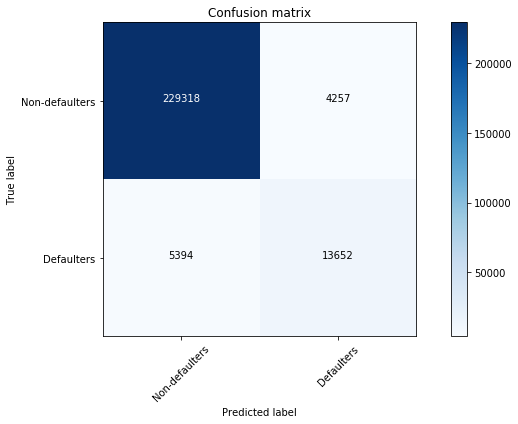

In [45]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

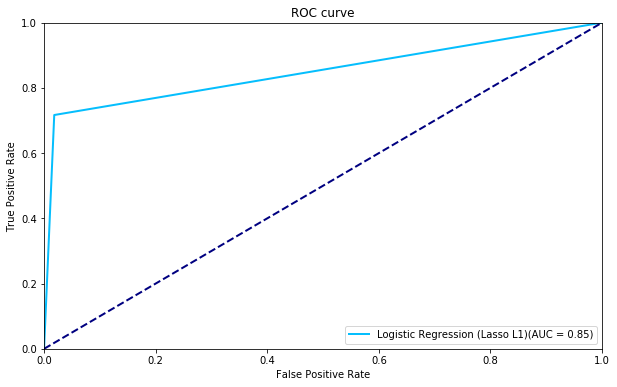

In [46]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred, 'Logistic Regression (Lasso L1)')
plt.show()

### Model no. 2 - Decision Trees.

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtc.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [48]:
y_pred = dtc.predict(X_test)

In [49]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
dtc_results = pd.DataFrame([['Decision Tree Classifier', acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(dtc_results, ignore_index = True)
results

Model  Accuracy  Precision  Recall Score  F1 Score
0          Lasso Regression  0.961797   0.762298      0.716791  0.738845
1  Decision Tree Classifier  0.947332   0.639827      0.689646  0.663803

Confusion matrix, without normalization
[[226181   7394]
 [  5911  13135]]


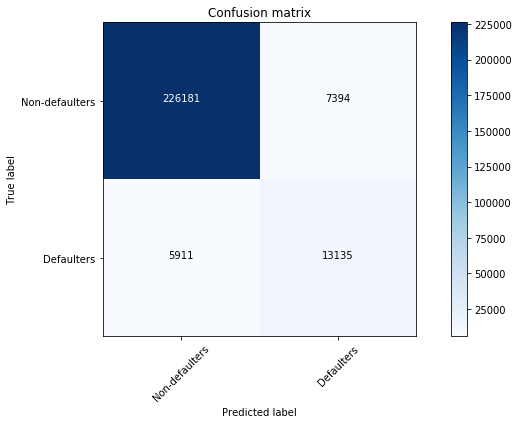

In [50]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

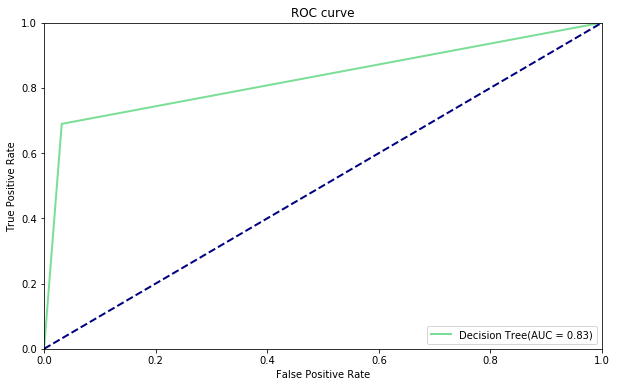

In [51]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred, 'Decision Tree')
plt.show()

### MODEL NO. 3 - Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
# Save the model using joblib library
Model2_rfc = 'Model2_RFC.pkl'
joblib.dump(rfc, Model2_rfc)

['Model2_RFC.pkl']

In [52]:
# To load the saved mode
#rfc = joblib.load('Model2_RFC.pkl')

In [55]:
y_pred_rf = rfc.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
rfc_results = pd.DataFrame([['Random_Forest_n=100', acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(rfc_results, ignore_index = True)
results

Model  Accuracy  Precision  Recall Score  F1 Score
0          Lasso Regression  0.961797   0.762298      0.716791  0.738845
1  Decision Tree Classifier  0.947332   0.639827      0.689646  0.663803
2       Random_Forest_n=100  0.971570   0.965547      0.645962  0.774066

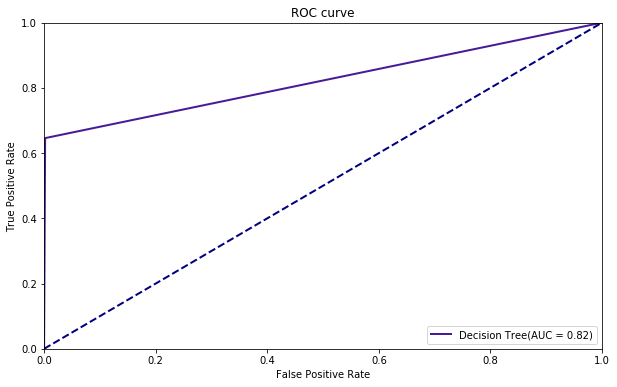

In [57]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_rf, 'Decision Tree')
plt.show()

#### We can see that the Random Forest Model performs the best out of all the three models, even though the recall score is low. So we'll use that model. Now we are going to validate the results using K-Fold Cross Validation.

#### K-Fold Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train.values.ravel(), cv=10 )
print("Random Forest Classifier accuracy %0.2f with a deviation of +/- %0.2f: " % (accuracies.mean(), accuracies.std()*2))

In [61]:
print("Random Forest Classifier accuracy %0.2f with a deviation of +/- %0.2f: " % (accuracies.mean(), accuracies.std()*2))

Random Forest Classifier accuracy 0.98 with a deviation of +/- 0.14: 


### *Parameter Tuning*.

* Applying Grid Search to the Random Forest Classifier Model as it gives the highest accuracy.

In [55]:
# Round 1: Entropy.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {"max_depth":[3, None],
         "max_features":[1, 5, 10],
         "min_samples_split":[2, 5, 10],    #Since the default is 2.
         "min_samples_leaf":[1, 5, 10],
         "bootstrap":[True, False],
         "criterion":['entropy']}

In [58]:
grid_search = GridSearchCV(estimator=rfc, param_grid=params, scoring="accuracy", cv=10, n_jobs=-1)

In [ ]:
grid_search = grid_search.fit(X_train, y_train.values.ravel())

### Following are some test results:

In [46]:
final_results = pd.concat([y_test, user_id_test], axis = 1).dropna()
final_results['Predictions'] = y_pred
final_results = final_results[['id','Default_Binary','Predictions']]
final_results.head(10)

id  Default_Binary  Predictions
5   1075269             0.0            0
6   1069639             0.0            0
7   1072053             0.0            0
13  1069866             0.0            1
19  1069742             0.0            0
31  1069539             0.0            0
36  1069361             0.0            0
37  1069357             0.0            0
45  1051117             0.0            0
46  1069465             1.0            1

* As we can see this model predicts pretty well.